In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


**РАЙОНЫ**

Для построения графиков цен я рассматриваю только квартиры со стоимостью <500 долларов.

In [3]:
df_less_500=df[df.price < 500]

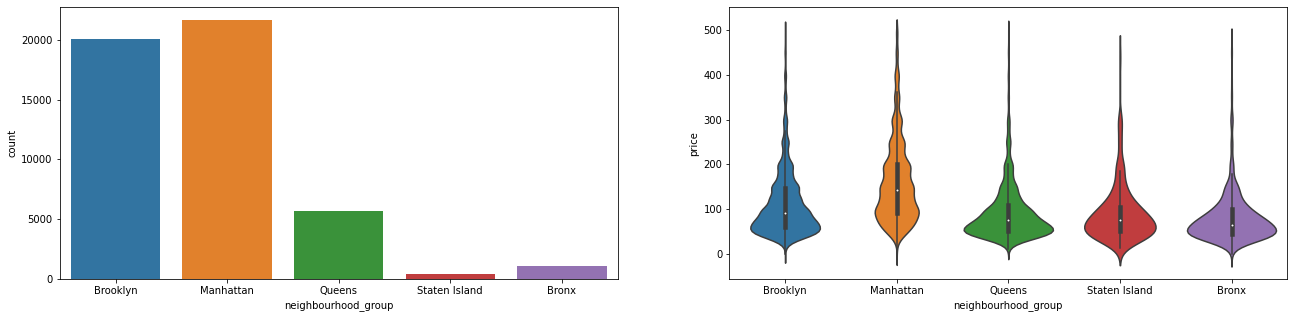

In [4]:
fig, axes = plt.subplots(1,2, figsize=(22,5))
x1 = sns.countplot(df['neighbourhood_group'] ,ax=axes[0])
x2 = sns.violinplot(data=df_less_500, x='neighbourhood_group', y='price', ax=axes[1])

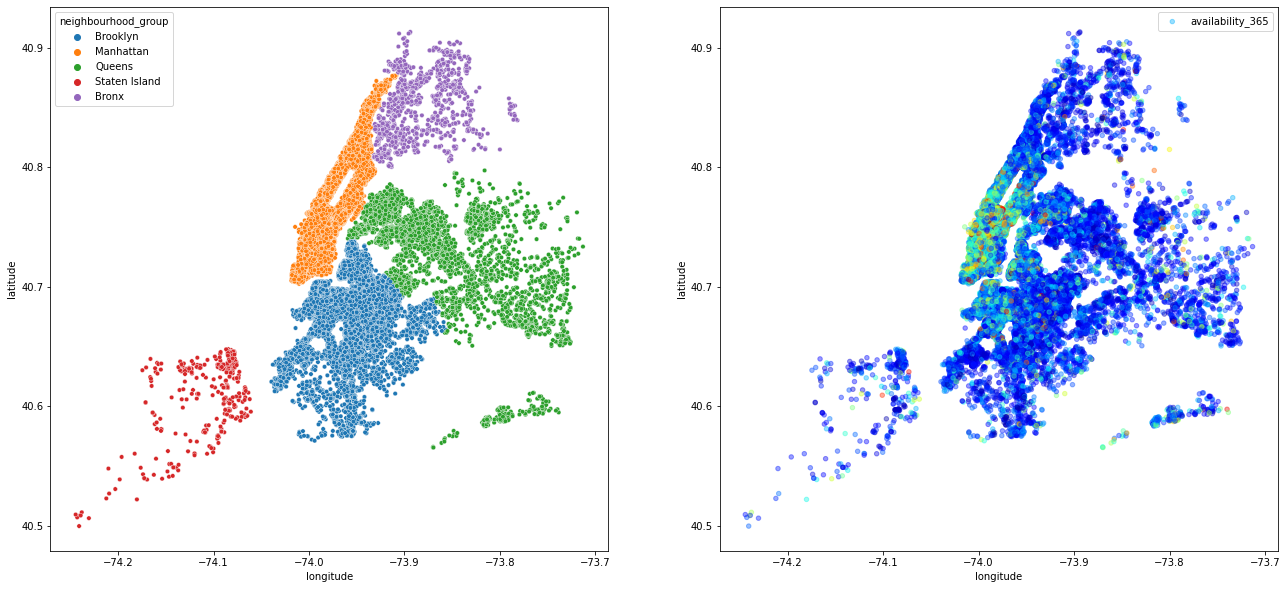

In [5]:
fig, axes = plt.subplots(1,2, figsize=(22,10))
sc = sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df, s=20, ax=axes[0])
v2=df_less_500.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=False, alpha=0.4, ax=axes[1])

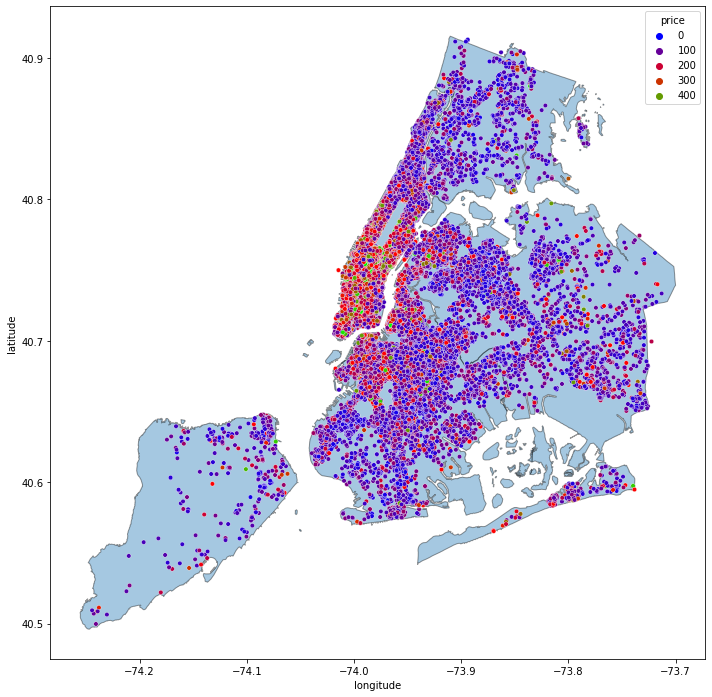

In [6]:
import geopandas

geometry = geopandas.points_from_xy(df.longitude, df.latitude)
geo_data = geopandas.GeoDataFrame(df,crs={'init':'epsg:4326'},geometry=geometry)
nyc = geopandas.read_file(geopandas.datasets.get_path('nybb'))
nyc = nyc.to_crs(epsg=4326)
fig,ax = plt.subplots(figsize=(12,12))
nyc.plot(ax=ax,alpha=0.4,edgecolor='black')
sc = sns.scatterplot(x='longitude', y='latitude', hue='price', ax=ax, data=df_less_500, s=20, palette="brg")

**МИКРОРАЙОНЫ**

<BarContainer object of 10 artists>

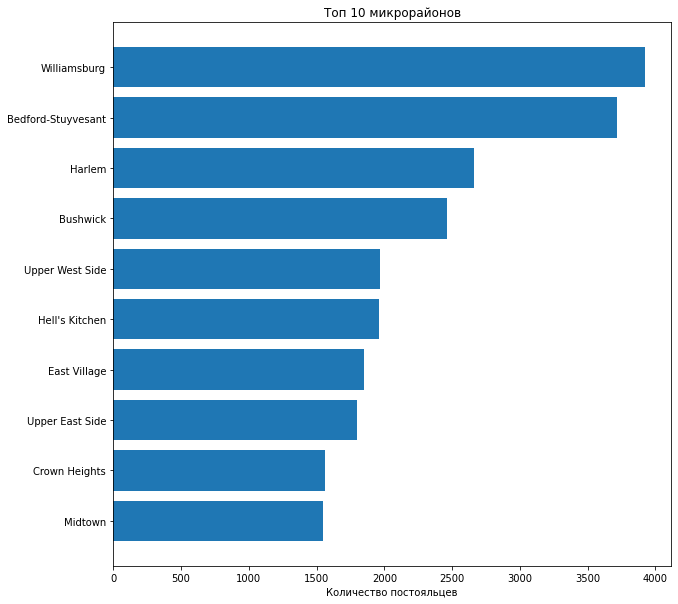

In [7]:


data = df.neighbourhood.value_counts()[:10]
plt.figure(figsize=(10, 10))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()
plt.title("Топ 10 микрорайонов")
plt.xlabel("Количество постояльцев")
plt.barh(x, y)


**Типы квартир**

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

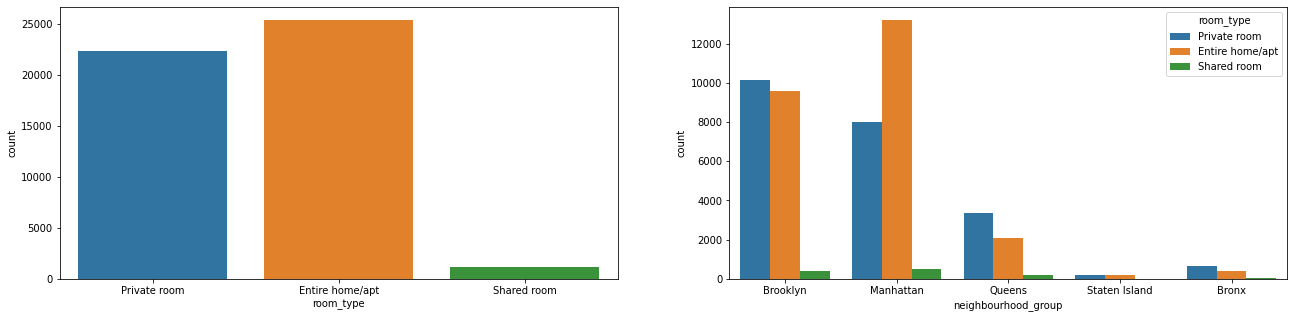

In [8]:
fig, axes = plt.subplots(1,2, figsize=(22,5))
sns.countplot(x='room_type', data=df, ax=axes[0]) 
sns.countplot(df['neighbourhood_group'],hue=df['room_type'], ax=axes[1])

Text(0.5, 1.0, 'Цены')

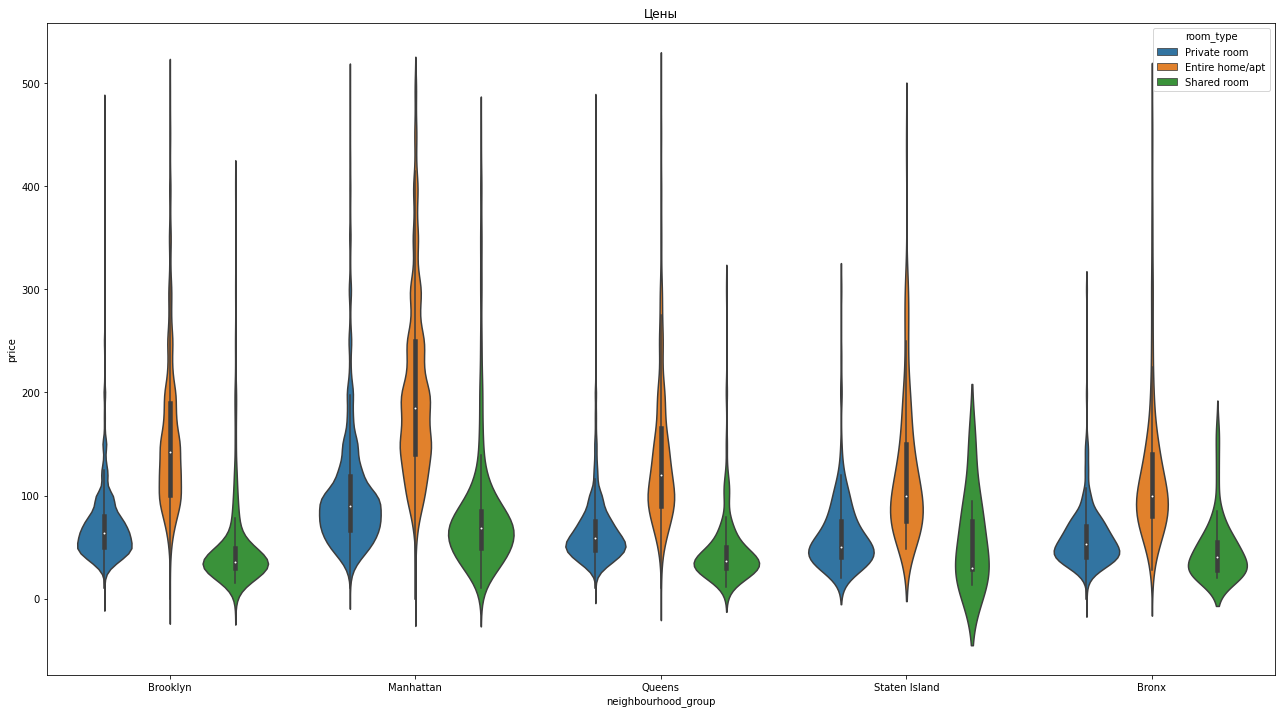

In [9]:
plt.figure(figsize=(22, 12))
f = sns.violinplot(x="neighbourhood_group", y="price", hue="room_type", data=df_less_500, height=12)
plt.title('Цены')